In [20]:
import pandas as pd
from fact.io import read_h5py
from astropy.table import QTable
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [9, 6]

In [2]:
SIM_VERSION = '20201023_v0.6.3_prod5_local_wo_n_islands'

In [3]:
df_gamma_diff = pd.read_hdf(
    f'../simulations/dl1_gamma-diffuse_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_gamma = pd.read_hdf(
    f'../simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_proton = pd.read_hdf(
    f'../simulations/dl1_proton_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)

In [4]:
max_intensity = 1500
df_gamma_diff_selected = df_gamma_diff.query(f'intensity < {max_intensity}')
df_gamma_selected = df_gamma.query(f'intensity < {max_intensity}')
df_proton_selected = df_proton.query(f'intensity < {max_intensity}')

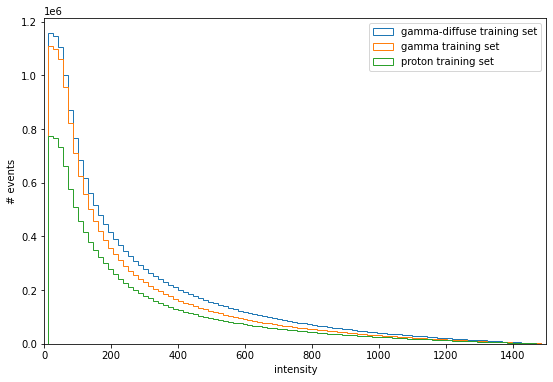

In [5]:
plt.hist(df_gamma_diff_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma-diffuse training set')
plt.hist(df_gamma_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma training set')
plt.hist(df_proton_selected.intensity, bins=100, histtype='step', cumulative=-1, label='proton training set')

plt.xlabel('intensity')
plt.ylabel('# events')
plt.xlim(0, max_intensity)
plt.legend()

In [6]:
import tables

with tables.open_file(f'../simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5') as f:
    sim_runs = f.root.simulation.run_config[:]

print(*sim_runs.dtype.names)
print(np.sum(sim_runs['num_showers']))

obs_id run_array_direction corsika_version simtel_version energy_range_min energy_range_max prod_site_B_total prod_site_B_declination prod_site_B_inclination prod_site_alt spectral_index shower_prog_start shower_prog_id detector_prog_start detector_prog_id num_showers shower_reuse max_alt min_alt max_az min_az diffuse max_viewcone_radius min_viewcone_radius max_scatter_range min_scatter_range core_pos_mode injection_height atmosphere corsika_iact_options corsika_low_E_model corsika_high_E_model corsika_bunchsize corsika_wlen_min corsika_wlen_max corsika_low_E_detail corsika_high_E_detail
5000000


In [7]:
from pyirf.simulations import SimulatedEventsInfo

SimulatedEventsInfo?
#n_showers = sum(num_showers) oder num_showers*shower_reuse
#max_impact = max_scatter_range
#viewcone = max_viewcone_radius | min_viewcone_radius 


In [8]:
import h5py

with h5py.File(f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5', mode='r') as f:
    print('corsika_runs' in f)

True


In [9]:
gamma_testing_info = read_h5py(
    f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='corsika_runs'
)
print(gamma_testing_info.columns)

Index(['atmosphere', 'core_pos_mode', 'corsika_bunchsize',
       'corsika_high_E_detail', 'corsika_high_E_model', 'corsika_iact_options',
       'corsika_low_E_detail', 'corsika_low_E_model', 'corsika_version',
       'corsika_wlen_max', 'corsika_wlen_min', 'detector_prog_id',
       'detector_prog_start', 'diffuse', 'energy_range_max',
       'energy_range_min', 'injection_height', 'max_alt', 'max_az',
       'max_scatter_range', 'max_viewcone_radius', 'min_alt', 'min_az',
       'min_scatter_range', 'min_viewcone_radius', 'num_showers', 'obs_id',
       'prod_site_B_declination', 'prod_site_B_inclination',
       'prod_site_B_total', 'prod_site_alt', 'shower_prog_id',
       'shower_prog_start', 'shower_reuse', 'simtel_version',
       'spectral_index'],
      dtype='object')


In [30]:
gamma_testing_events = read_h5py(
    f'../build/dl2_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='events'
)
gamma_testing_events

,alt_tel,az_tel,calibration_id,concentration_cog,concentration_core,concentration_pixel,disp_angle,disp_dx,disp_dy,disp_norm,...,tel_id,tel_pos_x,tel_pos_y,tel_pos_z,time_gradient,trigger_type,width,wl,x,y
1,1.214749,3.141593,-1,0.412515,0.426727,0.225439,1.460700,0.043723,0.395527,0.397936,...,1,-70.93,-52.07,43.0,5.551106,0,0.054499,0.272899,0.151754,-0.395527
4,1.214749,3.141593,-1,0.557140,0.534298,0.365572,-1.001803,0.155758,-0.243543,0.289091,...,1,-70.93,-52.07,43.0,1.073886,0,0.043810,0.397579,0.039718,0.243543
8,1.214749,3.141593,-1,0.212453,0.298194,0.165901,-1.143291,-0.133894,0.293881,0.322945,...,1,-70.93,-52.07,43.0,1.487374,0,0.055732,0.265966,0.329370,-0.293881
9,1.214749,3.141593,-1,0.163006,0.324765,0.141243,0.447629,-0.406425,-0.195138,0.450844,...,1,-70.93,-52.07,43.0,5.155723,0,0.066969,0.344313,0.601901,0.195138
11,1.214749,3.141593,-1,0.346352,0.280235,0.188952,0.378292,0.553558,0.220003,0.595674,...,1,-70.93,-52.07,43.0,-5.114391,0,0.042976,0.254494,-0.358081,-0.220003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181918,1.214749,3.141593,-1,0.102999,0.311713,0.108941,1.199562,-0.205744,-0.528518,0.567152,...,1,-70.93,-52.07,43.0,6.593689,0,0.097103,0.376907,0.401220,0.528518
1181919,1.214749,3.141593,-1,0.197434,0.302943,0.139289,0.920961,0.417020,0.548751,0.689226,...,1,-70.93,-52.07,43.0,-4.479672,0,0.066693,0.265856,-0.221543,-0.548751
1181926,1.214749,3.141593,-1,0.070140,0.454702,0.316517,-1.326023,0.070788,-0.283397,0.292104,...,1,-70.93,-52.07,43.0,-4.539084,0,0.082363,0.521467,0.124689,0.283397
1181938,1.214749,3.141593,-1,0.359812,0.300244,0.165118,1.014131,-0.163816,-0.263237,0.310047,...,1,-70.93,-52.07,43.0,-5.101193,0,0.051849,0.345800,0.359292,0.263237


In [15]:
from astropy.io import fits
pyirf_file = '../build/pyirf.fits.gz' 

hdul = fits.open(pyirf_file)
hdul.info()

Filename: ../build/pyirf.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SENSITIVITY    1 BinTableHDU     45   23R x 14C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  2  SENSITIVITY_STEP_2    1 BinTableHDU     45   23R x 14C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  THETA_CUTS    1 BinTableHDU     21   107R x 4C   [D, D, D, D]   
  4  THETA_CUTS_OPT    1 BinTableHDU     21   107R x 4C   [D, D, D, D]   
  5  GH_CUTS       1 BinTableHDU     20   23R x 4C   [D, D, D, D]   
  6  SENSITIVITY_UNOP    1 BinTableHDU     45   23R x 14C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  7  EFFECTIVE_AREA    1 BinTableHDU     38   1R x 5C   [44D, 44D, D, D, 44D]   
  8  ENERGY_DISPERSION    1 BinTableHDU     46   1R x 7C   [44D, 44D, 199D, 199D, D, D, 8756D]   
  9  EFFECTIVE_AREA_NO_CUTS    1 BinTableHDU     38   1R x 5C   [44D, 44D, D, D, 44D]   
 10  ENERGY_DISPERSION_NO_CUTS    1 BinTableHDU     46   1

In [25]:
hdul.close()

theta_cuts = QTable.read(pyirf_file, hdu='THETA_CUTS_OPT')
theta_cuts

low,high,center,cut
TeV,TeV,TeV,deg
float64,float64,float64,float64
0.0,0.015848931924611134,0.007924465962305567,0.32
0.015848931924611134,0.017378008287493755,0.016613470106052443,0.32
0.017378008287493755,0.019054607179632473,0.018216307733563114,0.32
0.019054607179632473,0.020892961308540396,0.019973784244086433,0.32
0.020892961308540396,0.022908676527677734,0.021900818918109063,0.32
0.022908676527677734,0.025118864315095808,0.02401377042138677,0.32
0.025118864315095808,0.027542287033381675,0.026330575674238743,0.32
0.027542287033381675,0.030199517204020178,0.028870902118700928,0.32


In [26]:
gh_cuts = QTable.read(pyirf_file, hdu='GH_CUTS')
gh_cuts

low,center,high,cut
TeV,TeV,TeV,
float64,float64,float64,float64
0.0,0.007924465962305567,0.015848931924611134,1.0
0.015848931924611134,0.020483898119853464,0.025118864315095794,1.0
0.025118864315095794,0.032464790685222754,0.03981071705534971,0.49592260626371965
0.03981071705534971,0.05145322575168451,0.0630957344480193,0.6618229702309458
0.0630957344480193,0.08154786722400963,0.09999999999999995,0.7830497310048636
0.09999999999999995,0.1292446596230556,0.15848931924611126,0.8453251078251981
0.15848931924611126,0.20483898119853455,0.25118864315095785,0.8486520499743957
0.25118864315095785,0.3246479068522274,0.3981071705534969,0.9060632823962906


In [43]:
dl2_run = read_h5py(
    f'../build/dl2_v0.6.3_v05_LST-1.Run02922.h5',
    key='events'
)
dl2_run.columns

Index(['alt_tel', 'az_tel', 'calibration_id', 'concentration_cog',
       'concentration_core', 'concentration_pixel', 'disp_prediction',
       'dragon_time', 'event_id', 'focal_length', 'gamma_energy_prediction',
       'gammaness', 'intensity', 'intercept', 'kurtosis',
       'leakage_intensity_width_1', 'leakage_intensity_width_2',
       'leakage_pixels_width_1', 'leakage_pixels_width_2', 'length',
       'log_intensity', 'mc_core_distance', 'mc_type', 'n_islands', 'n_pixels',
       'obs_id', 'phi', 'psi', 'r', 'skewness', 'source_alt_prediction',
       'source_az_prediction', 'source_dec_prediction', 'source_ra_prediction',
       'source_x_prediction', 'source_y_prediction', 'tel_id', 'tel_pos_x',
       'tel_pos_y', 'tel_pos_z', 'tib_time', 'time_gradient', 'trigger_time',
       'trigger_type', 'ucts_time', 'ucts_trigger_type', 'width', 'wl', 'x',
       'y'],
      dtype='object')